# Filtración de complejos simpliciales e inferencia de datos - AC1: Rips, Cech, Alpha

In [28]:
pip install gudhi

In [29]:
## Inicializando
import numpy as np ## Para arreglos
import pandas as pd ## Para trabajar con bases de dtatos
import matplotlib.pyplot as plt ## Para graficar
from matplotlib import cm ## Para manejar colores
from scipy.spatial.distance import squareform, pdist ## Para calcular matrices de distancias y hacer inferencias de los parámetros
import matplotlib.patches as mpatches ## Para hacer elipses
from matplotlib.collections import PatchCollection ## Para hacer elipses
import gudhi ## Para hacer la filtración de complejos simpliciales de Rips y Alpha

## Indexación en caso general

       a   b
Point       
P1     1   1
P2     7   0
P3     4   6
P4     9   6
P5     0  14
P6     2  19
P7     9  17


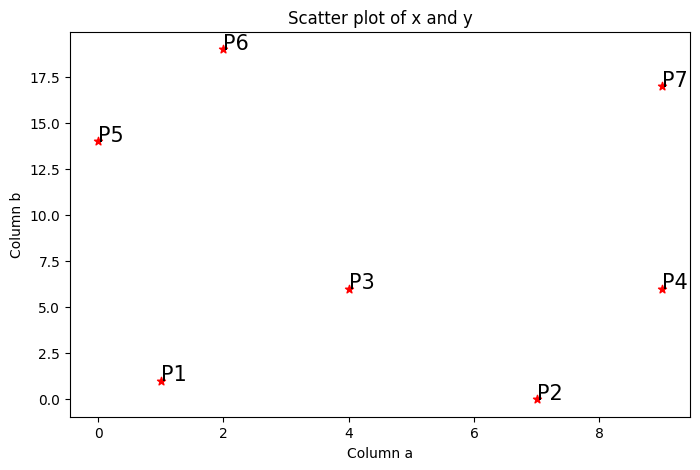

In [30]:
## Caso general
a = [1, 7, 4, 9, 0, 2, 9]
b = [1, 0, 6, 6, 14, 19, 17]

point = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']
data = pd.DataFrame({'Point':point, 'a':np.round(a, 2), 'b':np.round(b, 2)})
data = data.set_index('Point')
print(data)

## Graficando los datos
plt.figure(figsize = (8, 5))
plt.scatter(data['a'], data['b'], c = 'r', marker = '*')
plt.xlabel('Column a')
plt.ylabel('Column b')
plt.title('Scatter plot of x and y')
for j in data.itertuples():
  plt.annotate(j.Index, (j.a, j.b), fontsize = 15)


# NÚMEROOS DE BETI DISTINTOS PARA PROBAR QUE NO SON HOMEOMORFOS

In [31]:
## Calculando la matriz de distancias euclideanas
dist = pd.DataFrame(squareform(pdist(data[["a", "b"]]), "euclidean"), columns = data.index.values, index = data.index.values)
dist

,P1,P2,P3,P4,P5,P6,P7
P1,0.000000,6.082763,5.830952,9.433981,13.038405,18.027756,17.888544
P2,6.082763,0.000000,6.708204,6.324555,15.652476,19.646883,17.117243
P3,5.830952,6.708204,0.000000,5.000000,8.944272,13.152946,12.083046
P4,9.433981,6.324555,5.000000,0.000000,12.041595,14.764823,11.000000
P5,13.038405,15.652476,8.944272,12.041595,0.000000,5.385165,9.486833
P6,18.027756,19.646883,13.152946,14.764823,5.385165,0.000000,7.280110
P7,17.888544,17.117243,12.083046,11.000000,9.486833,7.280110,0.000000


In [32]:
## Calculando la filtración de Rips con un radio de 20
rips_complex = gudhi.RipsComplex(points = [[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]],
                                 max_edge_length = 20.0)

In [33]:
# Generando el árbol de complejos simpliciales e imprimimos la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension = 2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
  repr(simplex_tree.num_simplices()) + 'simpllices - ' + \
  repr(simplex_tree.num_vertices()) + 'vertices.'

print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
  print(fmt % tuple(filtered_value))

Rips complex is of dimension 2 - 63simpllices - 7vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[2, 3] -> 5.00
[4, 5] -> 5.39
[0, 2] -> 5.83
[0, 1] -> 6.08
[1, 3] -> 6.32
[1, 2] -> 6.71
[0, 1, 2] -> 6.71
[1, 2, 3] -> 6.71
[5, 6] -> 7.28
[2, 4] -> 8.94
[0, 3] -> 9.43
[0, 1, 3] -> 9.43
[0, 2, 3] -> 9.43
[4, 6] -> 9.49
[4, 5, 6] -> 9.49
[3, 6] -> 11.00
[3, 4] -> 12.04
[2, 3, 4] -> 12.04
[3, 4, 6] -> 12.04
[2, 6] -> 12.08
[2, 3, 6] -> 12.08
[2, 4, 6] -> 12.08
[0, 4] -> 13.04
[0, 2, 4] -> 13.04
[0, 3, 4] -> 13.04
[2, 5] -> 13.15
[2, 4, 5] -> 13.15
[2, 5, 6] -> 13.15
[3, 5] -> 14.76
[2, 3, 5] -> 14.76
[3, 4, 5] -> 14.76
[3, 5, 6] -> 14.76
[1, 4] -> 15.65
[0, 1, 4] -> 15.65
[1, 2, 4] -> 15.65
[1, 3, 4] -> 15.65
[1, 6] -> 17.12
[1, 2, 6] -> 17.12
[1, 3, 6] -> 17.12
[1, 4, 6] -> 17.12
[0, 6] -> 17.89
[0, 1, 6] -> 17.89
[0, 2, 6] -> 17.89
[0, 3, 6] -> 17.89
[0, 4, 6] -> 17.89
[0, 5] -> 18.03
[0, 2, 5] -> 18.03
[0, 3, 5] -> 18.03
[0, 4, 5] -> 18.03
[

In [70]:
def plot_rips_complex(data, R, label = "data", col = 1, maxdim = 2):
  tab10 = plt.get_cmap('tab10')

  fig, ax = plt.subplots(figsize = (6 , 6))
  ax.set_title(label)
  ax.scatter(
      data[:, 0], data[:, 1], label = label,
      s = 8 , alpha = 0.9 , c = np.array(tab10([col] * len(data)))
  )

  for xy in data:
      ax.add_patch(mpatches.Circle(xy, radius = R, fc = 'none', ec = tab10 (col) , alpha = 0.2))

  for i , xy in enumerate(data):
    if maxdim >= 1:
      for j in range(i + 1 , len(data)):
        pq = data[j]
        if(xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
          pts = np . array ([xy, pq])
          ax.plot(pts[:, 0], pts[:, 1], color = tab10(col), alpha = 0.6, linewidth = 1)
        if maxdim == 2:
          for k in range (j + 1, len(data)):
            ab = data [k]
            if((ab != pq).all()
              and (np.linalg.norm(xy - pq) <= R)
              and (np.linalg.norm(xy - ab) <= R)
              and (np.linalg.norm(pq - ab) <= R)
            ):
              pts = np . array ([ xy , pq , ab ])
              ax . fill ( pts [: , 0] , pts [: , 1] , facecolor = tab10 ( col ) , alpha =0.1)
            pass
  plt.axis('equal')
  plt.tight_layout()
  plt.show()
  pass

# Actividad 1

In [35]:
act1 = pd.read_csv("Activity1.csv")
act1 = act1.rename(columns={'0': 'a', '1': 'b'})

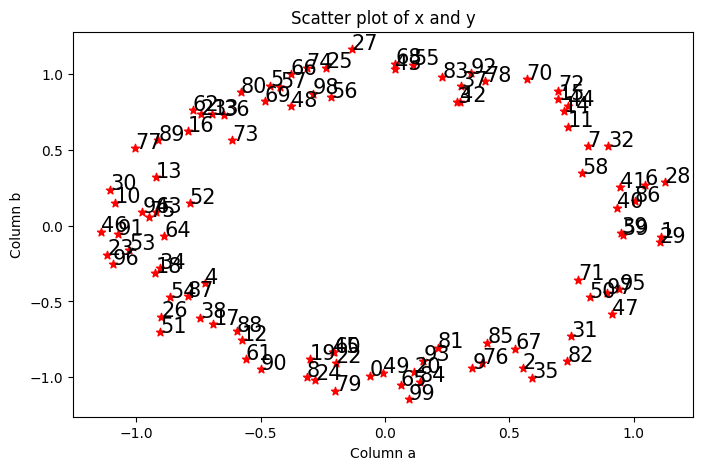

In [36]:
data = act1

## Graficando los datos
plt.figure(figsize = (8, 5))
plt.scatter(data['a'], data['b'], c = 'r', marker = '*')
plt.xlabel('Column a')
plt.ylabel('Column b')
plt.title('Scatter plot of x and y')
for j in data.itertuples():
  plt.annotate(j.Index, (j.a, j.b), fontsize = 15)

## Filtración de Rips

In [37]:
## Calculando la matriz de distancias euclideanas
dist = pd.DataFrame(squareform(pdist(data[["a", "b"]]), "euclidean"), columns = data.index.values, index = data.index.values)
dist

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,1.485551,0.617617,1.838258,0.899133,1.953101,1.675884,1.746904,0.251628,0.415931,...,0.439108,1.377628,2.035153,0.238751,1.412562,1.154722,1.266636,1.099185,1.871510,0.221128
1,1.485551,0.000000,1.025151,1.210266,1.857029,1.861869,0.350995,0.666535,1.693717,1.148452,...,1.828640,2.183543,1.324574,1.253893,2.092554,0.381746,2.211048,0.427753,1.688370,1.471026
2,0.617617,1.025151,0.000000,1.771613,1.392533,2.118670,1.302420,1.482042,0.868867,0.202658,...,1.052383,1.851240,1.953305,0.402207,1.841215,0.647695,1.783139,0.598041,1.992680,0.500694
3,1.838258,1.210266,1.771613,0.000000,1.565799,0.759963,0.931277,0.600631,1.907239,1.753888,...,1.929427,1.617595,0.197498,1.708330,1.461027,1.395358,1.749808,1.396198,0.582859,1.967375
4,0.899133,1.857029,1.392533,1.565799,0.000000,1.327453,1.882518,1.781682,0.738533,1.209981,...,0.609013,0.478495,1.747378,1.013645,0.531153,1.665004,0.391843,1.616591,1.320315,1.120216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.154722,0.381746,0.647695,1.395358,1.665004,1.941771,0.695625,0.949291,1.381125,0.786766,...,1.534243,2.048568,1.544391,0.916899,1.984259,0.000000,2.042786,0.055574,1.781848,1.112789
96,1.266636,2.211048,1.783139,1.749808,0.391843,1.336528,2.202346,2.060810,1.074972,1.598143,...,0.911705,0.201778,1.912102,1.399637,0.361985,2.042786,0.000000,1.995962,1.381533,1.485644
97,1.099185,0.427753,0.598041,1.396198,1.616591,1.924638,0.729730,0.969574,1.325628,0.732893,...,1.479161,2.004957,1.550017,0.861417,1.943547,0.055574,1.995962,0.000000,1.767170,1.058718
98,1.871510,1.688370,1.992680,0.582859,1.320315,0.180234,1.463273,1.157728,1.862635,1.916541,...,1.825976,1.210617,0.648617,1.811605,1.039881,1.781848,1.381533,1.767170,0.000000,2.048146


In [59]:
points1 = data[['a', 'b']].to_numpy()

In [133]:
## Calculando la filtración de Rips con un radio de 20
rips_complex = gudhi.RipsComplex(points = points1, max_edge_length = 2) ## Truncando los más separados (después de 2)

In [68]:
# Generando el árbol de complejos simpliciales e imprimiendo la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension = 2)
result_str = 'Rips complex 1 is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %.2f'

for filtered_value in simplex_tree.get_filtration():
  print(fmt % tuple(filtered_value))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[51, 66, 99] -> 2.19
[52, 66, 99] -> 2.19
[53, 66, 99] -> 2.19
[54, 66, 99] -> 2.19
[56, 66, 99] -> 2.19
[57, 66, 99] -> 2.19
[58, 66, 99] -> 2.19
[59, 66, 99] -> 2.19
[60, 66, 99] -> 2.19
[61, 66, 99] -> 2.19
[62, 66, 99] -> 2.19
[63, 66, 99] -> 2.19
[64, 66, 99] -> 2.19
[65, 66, 99] -> 2.19
[66, 67, 99] -> 2.19
[66, 69, 99] -> 2.19
[66, 70, 99] -> 2.19
[66, 71, 99] -> 2.19
[66, 72, 99] -> 2.19
[66, 73, 99] -> 2.19
[66, 75, 99] -> 2.19
[66, 76, 99] -> 2.19
[66, 77, 99] -> 2.19
[66, 78, 99] -> 2.19
[66, 79, 99] -> 2.19
[66, 80, 99] -> 2.19
[66, 81, 99] -> 2.19
[66, 82, 99] -> 2.19
[66, 83, 99] -> 2.19
[66, 84, 99] -> 2.19
[66, 85, 99] -> 2.19
[66, 86, 99] -> 2.19
[66, 87, 99] -> 2.19
[66, 88, 99] -> 2.19
[66, 89, 99] -> 2.19
[66, 90, 99] -> 2.19
[66, 91, 99] -> 2.19
[66, 92, 99] -> 2.19
[66, 93, 99] -> 2.19
[66, 94, 99] -> 2.19
[66, 95, 99] -> 2.19
[66, 96, 99] -> 2.19
[66, 97, 99] -> 2.19
[66, 98, 99] -> 2.19
[82, 89] 

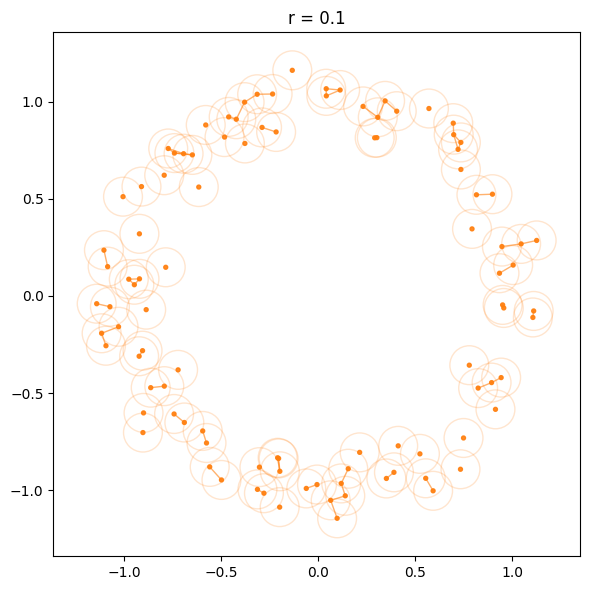

In [134]:
plot_rips_complex(points1, R = 0.1, label = 'r = 0.1', maxdim = 1)

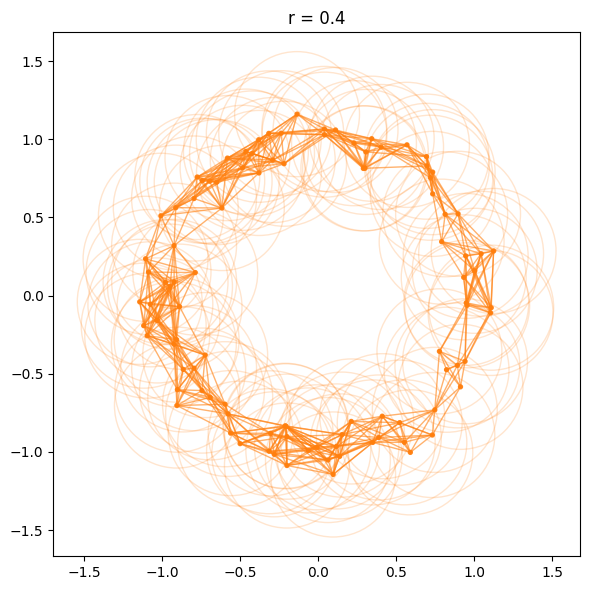

In [135]:
plot_rips_complex(points1, R = 0.4, label = 'r = 0.4', maxdim = 1)

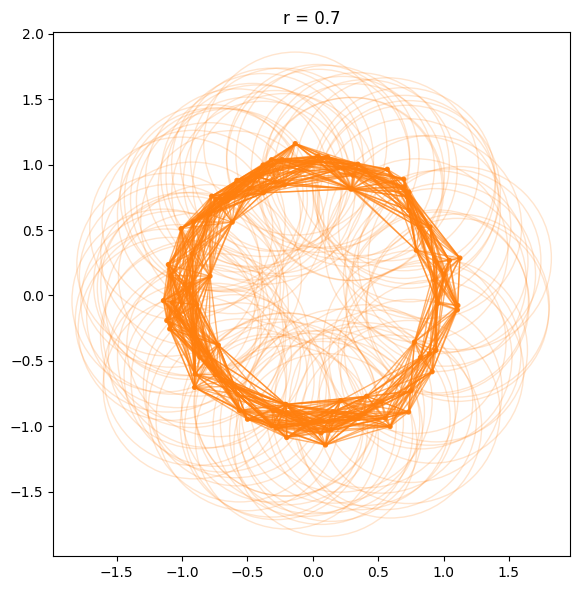

In [136]:
plot_rips_complex(points1, R = 0.7, label = 'r = 0.7', maxdim = 1)

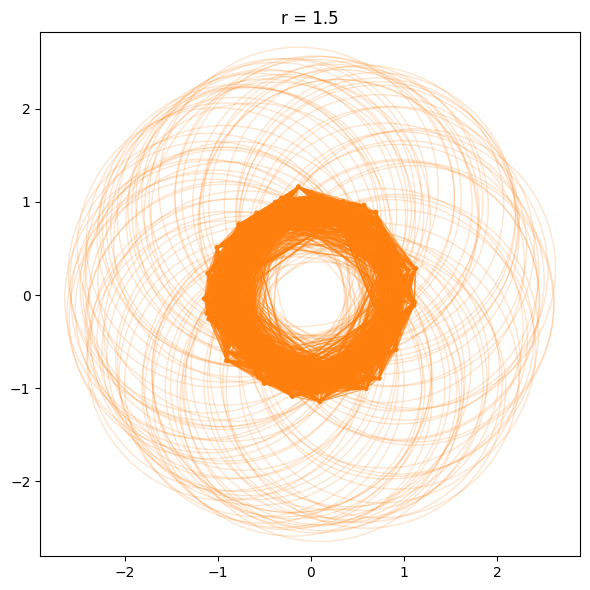

In [137]:
plot_rips_complex(points1, R = 1.5, label = 'r = 1.5', maxdim = 1)

## Filtración de Alpha

In [138]:
alpha1 = gudhi.AlphaComplex(points = points1)

simplex_tree = alpha1.create_simplex_tree()

result_str = 'Alpha complex 1 is of dimension ' + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex 1 is of dimension  - 557 simpllices - 100 vertices.
[0] -> 0.000000
[1] -> 0.000000
[2] -> 0.000000
[3] -> 0.000000
[4] -> 0.000000
[5] -> 0.000000
[6] -> 0.000000
[7] -> 0.000000
[8] -> 0.000000
[9] -> 0.000000
[10] -> 0.000000
[11] -> 0.000000
[12] -> 0.000000
[13] -> 0.000000
[14] -> 0.000000
[15] -> 0.000000
[16] -> 0.000000
[17] -> 0.000000
[18] -> 0.000000
[19] -> 0.000000
[20] -> 0.000000
[21] -> 0.000000
[22] -> 0.000000
[23] -> 0.000000
[24] -> 0.000000
[25] -> 0.000000
[26] -> 0.000000
[27] -> 0.000000
[28] -> 0.000000
[29] -> 0.000000
[30] -> 0.000000
[31] -> 0.000000
[32] -> 0.000000
[33] -> 0.000000
[34] -> 0.000000
[35] -> 0.000000
[36] -> 0.000000
[37] -> 0.000000
[38] -> 0.000000
[39] -> 0.000000
[40] -> 0.000000
[41] -> 0.000000
[42] -> 0.000000
[43] -> 0.000000
[44] -> 0.000000
[45] -> 0.000000
[46] -> 0.000000
[47] -> 0.000000
[48] -> 0.000000
[49] -> 0.000000
[50] -> 0.000000
[51] -> 0.000000
[52] -> 0.000000
[53] -> 0.000000
[54] -> 0.000000
[55] -> 0

# Actividad 2

In [139]:
act2 = pd.read_csv("Activity2.csv")
act2 = act2.rename(columns={'0': 'a', '1': 'b'})

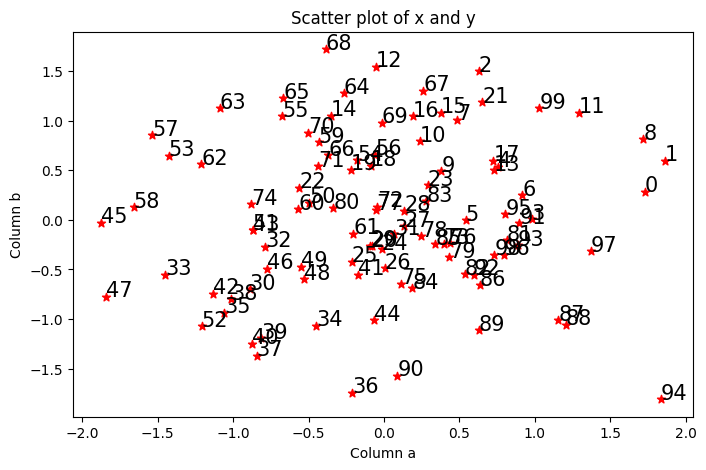

In [140]:
data = act2

## Graficando los datos
plt.figure(figsize = (8, 5))
plt.scatter(data['a'], data['b'], c = 'r', marker = '*')
plt.xlabel('Column a')
plt.ylabel('Column b')
plt.title('Scatter plot of x and y')
for j in data.itertuples():
  plt.annotate(j.Index, (j.a, j.b), fontsize = 15)

## Filtración de Rips

In [141]:
## Calculando la matriz de distancias euclideanas
dist = pd.DataFrame(squareform(pdist(data[["a", "b"]]), "euclidean"), columns = data.index.values, index = data.index.values)
dist

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.339478,1.636339,0.797410,1.002980,1.219369,0.811375,1.438593,0.527756,1.363058,...,2.477545,0.887711,1.408473,0.997360,2.097195,0.951810,1.129662,0.696764,1.181491,1.093202
1,0.339478,0.000000,1.526815,1.060195,1.106656,1.448557,1.006970,1.436712,0.257549,1.484403,...,2.802076,1.150206,1.710089,1.292399,2.406674,1.187996,1.427643,1.034317,1.474422,0.986229
2,1.636339,1.526815,0.000000,1.529563,0.969490,1.500964,1.282340,0.505953,1.289271,1.032942,...,3.117014,1.552354,2.048693,1.768501,3.519124,1.451334,1.855237,1.958068,1.849232,0.546283
3,0.797410,1.060195,1.529563,0.000000,0.572920,0.437453,0.247309,1.118052,1.093768,0.771242,...,1.815111,0.090732,0.679593,0.276629,2.008119,0.182448,0.404428,0.508002,0.435788,1.118798
4,1.002980,1.106656,0.969490,0.572920,0.000000,0.578646,0.330091,0.547060,1.003258,0.378188,...,2.212235,0.585148,1.099481,0.799231,2.580706,0.482039,0.887653,1.049725,0.885795,0.650006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.951810,1.187996,1.451334,0.182448,0.482039,0.267624,0.222402,1.006628,1.188887,0.608789,...,1.779270,0.129212,0.642757,0.319869,2.130836,0.000000,0.407256,0.678557,0.412173,1.093287
96,1.129662,1.427643,1.855237,0.404428,0.887653,0.430435,0.611002,1.396670,1.487689,0.940590,...,1.411014,0.335800,0.282901,0.135784,1.790857,0.407256,0.000000,0.579399,0.063017,1.495541
97,0.696764,1.034317,1.958068,0.508002,1.049725,0.886724,0.723014,1.594645,1.179709,1.279237,...,1.797680,0.551678,0.813094,0.488632,1.564646,0.678557,0.579399,0.000000,0.642206,1.480571
98,1.181491,1.474422,1.849232,0.435788,0.885795,0.395659,0.625372,1.382720,1.526641,0.913332,...,1.381885,0.359121,0.243820,0.184147,1.829278,0.412173,0.063017,0.642206,0.000000,1.505324


In [142]:
points2 = data[['a', 'b']].to_numpy()

In [143]:
## Calculando la filtración de Rips con un radio de 20
rips_complex = gudhi.RipsComplex(points = points2, max_edge_length = 4) ## Truncando algunos más alejados

In [144]:
# Generando el árbol de complejos simpliciales e imprimiendo la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension = 2)
result_str = 'Rips complex 1 is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %.2f'

for filtered_value in simplex_tree.get_filtration():
  print(fmt % tuple(filtered_value))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[8, 21, 57] -> 3.26
[8, 22, 57] -> 3.26
[8, 23, 57] -> 3.26
[8, 24, 57] -> 3.26
[8, 25, 57] -> 3.26
[8, 26, 57] -> 3.26
[8, 27, 57] -> 3.26
[8, 28, 57] -> 3.26
[8, 29, 57] -> 3.26
[8, 30, 57] -> 3.26
[8, 31, 57] -> 3.26
[8, 32, 57] -> 3.26
[8, 34, 57] -> 3.26
[8, 36, 57] -> 3.26
[8, 38, 57] -> 3.26
[8, 39, 57] -> 3.26
[8, 41, 57] -> 3.26
[8, 42, 57] -> 3.26
[8, 43, 57] -> 3.26
[8, 44, 57] -> 3.26
[8, 46, 57] -> 3.26
[8, 48, 57] -> 3.26
[8, 49, 57] -> 3.26
[8, 50, 57] -> 3.26
[8, 51, 57] -> 3.26
[8, 53, 57] -> 3.26
[8, 54, 57] -> 3.26
[8, 55, 57] -> 3.26
[8, 56, 57] -> 3.26
[8, 57, 59] -> 3.26
[8, 57, 60] -> 3.26
[8, 57, 61] -> 3.26
[8, 57, 62] -> 3.26
[8, 57, 63] -> 3.26
[8, 57, 64] -> 3.26
[8, 57, 65] -> 3.26
[8, 57, 66] -> 3.26
[8, 57, 67] -> 3.26
[8, 57, 68] -> 3.26
[8, 57, 69] -> 3.26
[8, 57, 70] -> 3.26
[8, 57, 71] -> 3.26
[8, 57, 72] -> 3.26
[8, 57, 73] -> 3.26
[8, 57, 74] -> 3.26
[8, 57, 75] -> 3.26
[8, 57, 76] -

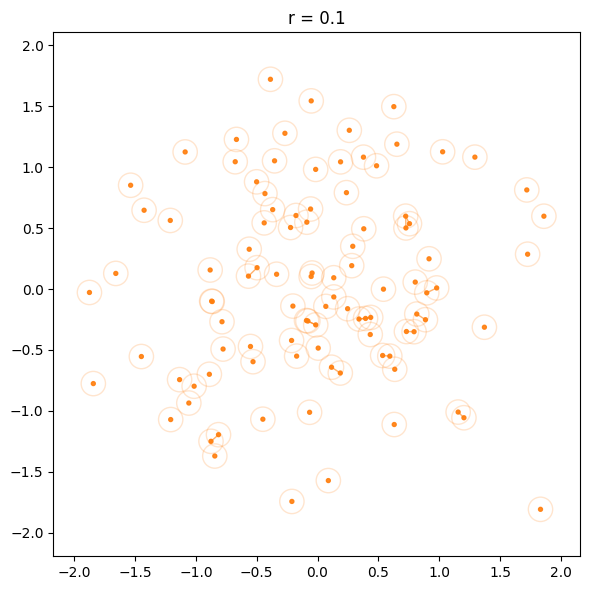

In [145]:
plot_rips_complex(points2, R = 0.1, label = 'r = 0.1', maxdim = 1)

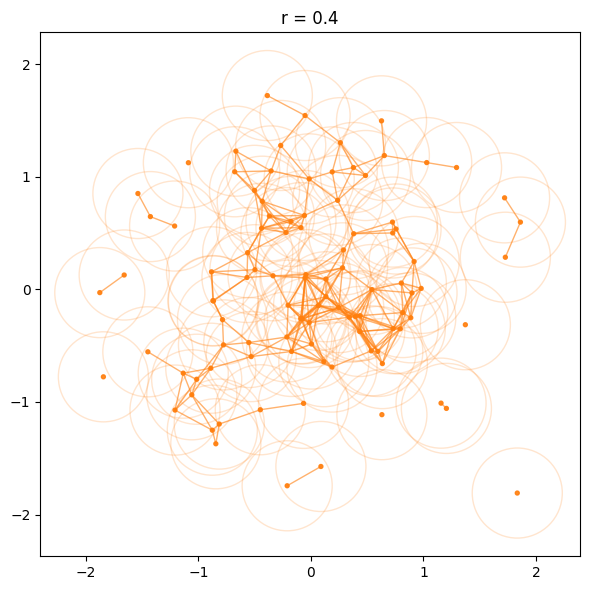

In [146]:
plot_rips_complex(points2, R = 0.4, label = 'r = 0.4', maxdim = 1)

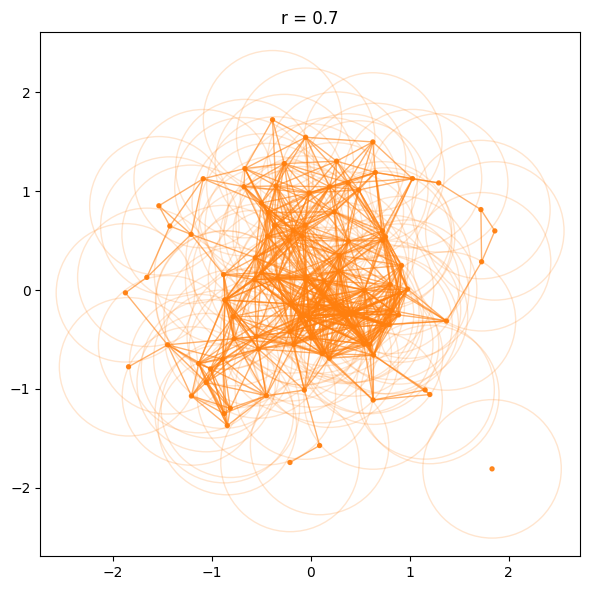

In [147]:
plot_rips_complex(points2, R = 0.7, label = 'r = 0.7', maxdim = 1)

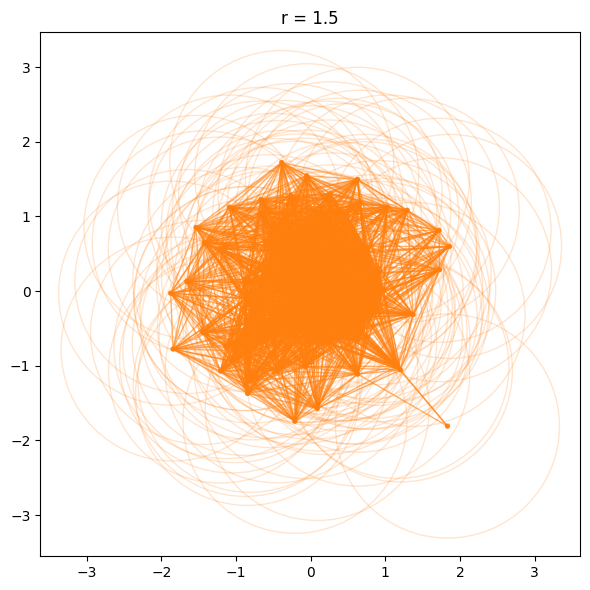

In [148]:
plot_rips_complex(points2, R = 1.5, label = 'r = 1.5', maxdim = 1)

## Filtración de Alpha

In [149]:
alpha1 = gudhi.AlphaComplex(points = points2)

simplex_tree = alpha1.create_simplex_tree()

result_str = 'Alpha complex 1 is of dimension ' + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex 1 is of dimension  - 573 simpllices - 100 vertices.
[0] -> 0.000000
[1] -> 0.000000
[2] -> 0.000000
[3] -> 0.000000
[4] -> 0.000000
[5] -> 0.000000
[6] -> 0.000000
[7] -> 0.000000
[8] -> 0.000000
[9] -> 0.000000
[10] -> 0.000000
[11] -> 0.000000
[12] -> 0.000000
[13] -> 0.000000
[14] -> 0.000000
[15] -> 0.000000
[16] -> 0.000000
[17] -> 0.000000
[18] -> 0.000000
[19] -> 0.000000
[20] -> 0.000000
[21] -> 0.000000
[22] -> 0.000000
[23] -> 0.000000
[24] -> 0.000000
[25] -> 0.000000
[26] -> 0.000000
[27] -> 0.000000
[28] -> 0.000000
[29] -> 0.000000
[30] -> 0.000000
[31] -> 0.000000
[32] -> 0.000000
[33] -> 0.000000
[34] -> 0.000000
[35] -> 0.000000
[36] -> 0.000000
[37] -> 0.000000
[38] -> 0.000000
[39] -> 0.000000
[40] -> 0.000000
[41] -> 0.000000
[42] -> 0.000000
[43] -> 0.000000
[44] -> 0.000000
[45] -> 0.000000
[46] -> 0.000000
[47] -> 0.000000
[48] -> 0.000000
[49] -> 0.000000
[50] -> 0.000000
[51] -> 0.000000
[52] -> 0.000000
[53] -> 0.000000
[54] -> 0.000000
[55] -> 0

# Actividad 3

In [174]:
act3 = pd.read_csv("Activity3.csv")
act3 = act3.rename(columns={'0': 'a', '1': 'b'})

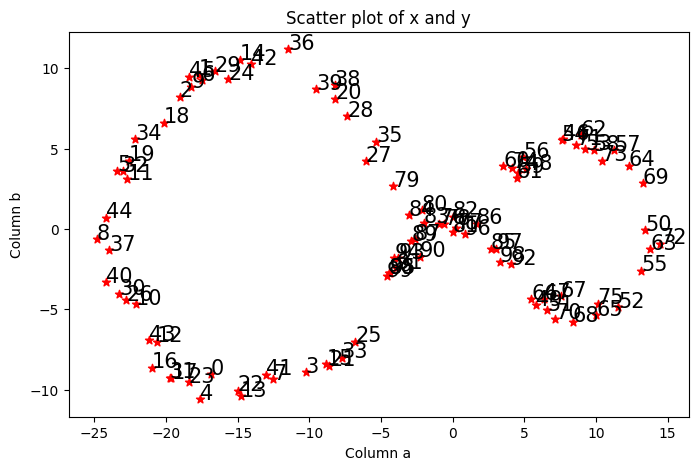

In [175]:
data = act3

## Graficando los datos
plt.figure(figsize = (8, 5))
plt.scatter(data['a'], data['b'], c = 'r', marker = '*')
plt.xlabel('Column a')
plt.ylabel('Column b')
plt.title('Scatter plot of x and y')
for j in data.itertuples():
  plt.annotate(j.Index, (j.a, j.b), fontsize = 15)

## Filtración de Rips

In [176]:
## Calculando la matriz de distancias euclideanas
dist = pd.DataFrame(squareform(pdist(data[["a", "b"]]), "euclidean"), columns = data.index.values, index = data.index.values)
dist

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,18.652085,17.402128,6.614525,1.739863,14.260669,18.306369,4.321607,11.569415,17.888074,...,16.290179,14.500682,22.001171,14.930703,14.691244,13.975678,19.722760,21.376105,21.347234,13.682761
1,18.652085,0.000000,1.904894,19.976156,20.192793,8.254895,0.390541,19.634802,12.484377,0.957017,...,19.133768,18.310447,24.743488,18.032438,17.792009,18.194851,21.048187,23.412926,24.037804,18.142380
2,17.402128,1.904894,0.000000,19.282322,18.877845,6.350069,1.837290,18.736088,10.609183,0.980201,...,19.483963,18.505823,25.325247,18.288663,18.032462,18.337289,21.649366,24.025338,24.603904,18.254622
3,6.614525,19.976156,19.282322,0.000000,7.569256,18.198738,19.589601,2.340488,16.773912,19.449567,...,10.722151,9.037785,15.806096,9.596807,9.424855,8.515836,14.027518,15.355846,15.204046,8.222856
4,1.739863,20.192793,18.877845,7.569256,0.000000,15.356038,19.854937,5.231932,12.277479,19.404334,...,17.708982,15.928539,23.252298,16.387453,16.158448,15.399392,21.128626,22.692734,22.618487,15.103600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.975678,18.194851,18.337289,8.515836,15.399392,20.094638,17.821981,10.497571,20.578130,18.064780,...,2.314504,0.531008,8.434551,1.099036,1.000292,0.000000,5.748713,7.567071,7.713798,0.297463
96,19.722760,21.048187,21.649366,14.027518,21.128626,24.580517,20.717177,16.139055,25.680663,21.158790,...,3.435578,5.227321,3.696745,4.856351,5.124293,5.748713,0.000000,2.376392,3.006916,6.040451
97,21.376105,23.412926,24.025338,15.355846,22.692734,26.902236,23.084039,17.575301,27.885291,23.531406,...,5.362697,7.084174,1.379394,6.844837,7.130859,7.567071,2.376392,0.000000,0.859994,7.837957
98,21.347234,24.037804,24.603904,15.204046,22.618487,27.326176,23.703715,17.459071,28.184245,24.132154,...,5.618672,7.259213,0.745004,7.091216,7.381338,7.713798,3.006916,0.859994,0.000000,7.969665


In [177]:
data = data.sort_values(by = 'a')
points3 = data[['a', 'b']].to_numpy()

In [178]:
## Calculando la filtración de Rips con un radio de 20
rips_complex = gudhi.RipsComplex(points = points3, max_edge_length = 39)

In [179]:
# Generando el árbol de complejos simpliciales e imprimiendo la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension = 2)
result_str = 'Rips complex 3 is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %.2f'

for filtered_value in simplex_tree.get_filtration():
  print(fmt % tuple(filtered_value))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[8, 14, 95] -> 36.33
[8, 15, 95] -> 36.33
[8, 16, 95] -> 36.33
[8, 17, 95] -> 36.33
[8, 18, 95] -> 36.33
[8, 19, 95] -> 36.33
[8, 20, 95] -> 36.33
[8, 21, 95] -> 36.33
[8, 22, 95] -> 36.33
[8, 23, 95] -> 36.33
[8, 24, 95] -> 36.33
[8, 25, 95] -> 36.33
[8, 26, 95] -> 36.33
[8, 27, 95] -> 36.33
[8, 28, 95] -> 36.33
[8, 29, 95] -> 36.33
[8, 30, 95] -> 36.33
[8, 31, 95] -> 36.33
[8, 32, 95] -> 36.33
[8, 33, 95] -> 36.33
[8, 34, 95] -> 36.33
[8, 35, 95] -> 36.33
[8, 36, 95] -> 36.33
[8, 37, 95] -> 36.33
[8, 38, 95] -> 36.33
[8, 39, 95] -> 36.33
[8, 40, 95] -> 36.33
[8, 41, 95] -> 36.33
[8, 42, 95] -> 36.33
[8, 43, 95] -> 36.33
[8, 44, 95] -> 36.33
[8, 45, 95] -> 36.33
[8, 46, 95] -> 36.33
[8, 47, 95] -> 36.33
[8, 48, 95] -> 36.33
[8, 49, 95] -> 36.33
[8, 50, 95] -> 36.33
[8, 51, 95] -> 36.33
[8, 52, 95] -> 36.33
[8, 53, 95] -> 36.33
[8, 54, 95] -> 36.33
[8, 55, 95] -> 36.33
[8, 56, 95] -> 36.33
[8, 57, 95] -> 36.33
[8, 58, 9

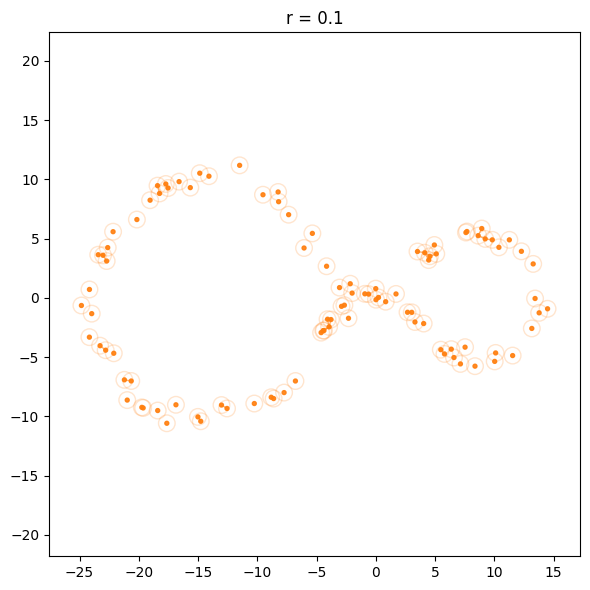

In [123]:
plot_rips_complex(points3, R = 0.7, label = 'r = 0.1', maxdim = 1)

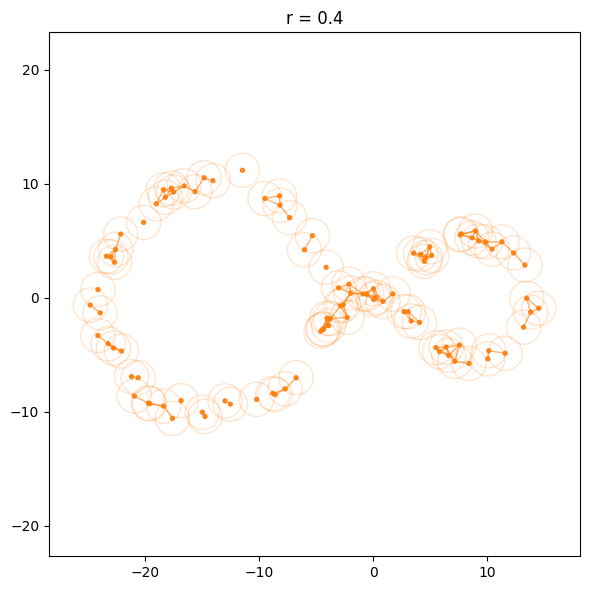

In [124]:
plot_rips_complex(points3, R = 1.5, label = 'r = 0.4', maxdim = 1)

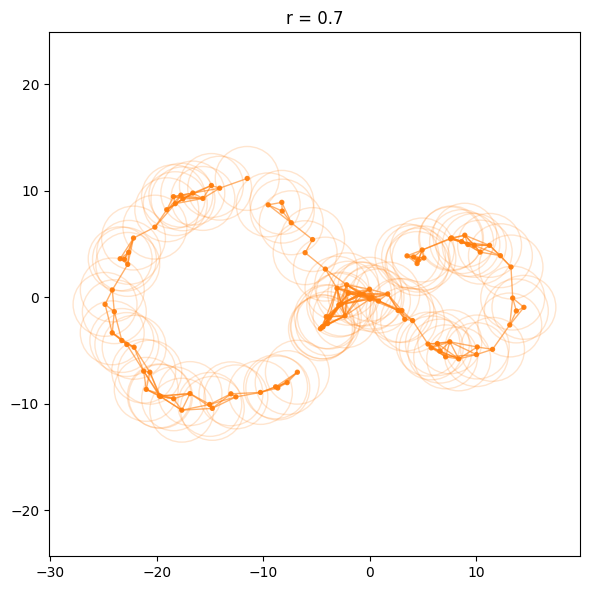

In [125]:
plot_rips_complex(points3, R = 3, label = 'r = 0.7', maxdim = 1)

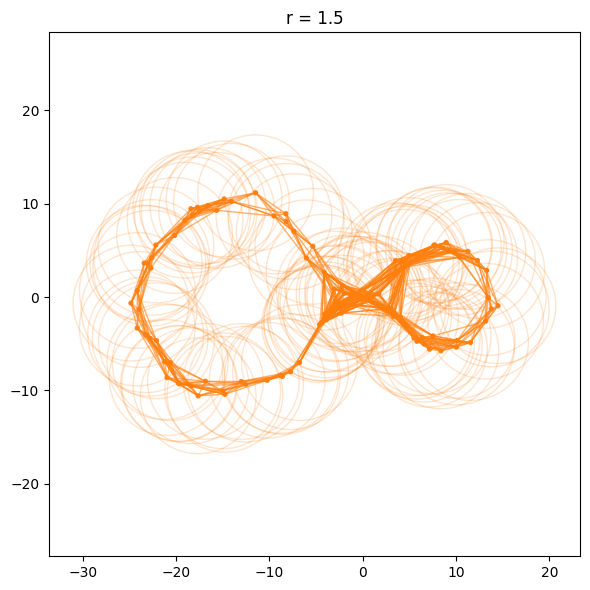

In [126]:
plot_rips_complex(points3, R = 6.2, label = 'r = 1.5', maxdim = 1)

## Filtración de Alpha

In [171]:
alpha1 = gudhi.AlphaComplex(points = points3)

simplex_tree = alpha1.create_simplex_tree()

result_str = 'Alpha complex 1 is of dimension ' + ' - ' + \
  repr(simplex_tree.num_simplices()) + ' simpllices - ' + \
  repr(simplex_tree.num_vertices()) + ' vertices.'

print(result_str)
fmt = '%s -> %f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex 1 is of dimension  - 559 simpllices - 100 vertices.
[0] -> 0.000000
[1] -> 0.000000
[2] -> 0.000000
[3] -> 0.000000
[4] -> 0.000000
[5] -> 0.000000
[6] -> 0.000000
[7] -> 0.000000
[8] -> 0.000000
[9] -> 0.000000
[10] -> 0.000000
[11] -> 0.000000
[12] -> 0.000000
[13] -> 0.000000
[14] -> 0.000000
[15] -> 0.000000
[16] -> 0.000000
[17] -> 0.000000
[18] -> 0.000000
[19] -> 0.000000
[20] -> 0.000000
[21] -> 0.000000
[22] -> 0.000000
[23] -> 0.000000
[24] -> 0.000000
[25] -> 0.000000
[26] -> 0.000000
[27] -> 0.000000
[28] -> 0.000000
[29] -> 0.000000
[30] -> 0.000000
[31] -> 0.000000
[32] -> 0.000000
[33] -> 0.000000
[34] -> 0.000000
[35] -> 0.000000
[36] -> 0.000000
[37] -> 0.000000
[38] -> 0.000000
[39] -> 0.000000
[40] -> 0.000000
[41] -> 0.000000
[42] -> 0.000000
[43] -> 0.000000
[44] -> 0.000000
[45] -> 0.000000
[46] -> 0.000000
[47] -> 0.000000
[48] -> 0.000000
[49] -> 0.000000
[50] -> 0.000000
[51] -> 0.000000
[52] -> 0.000000
[53] -> 0.000000
[54] -> 0.000000
[55] -> 0